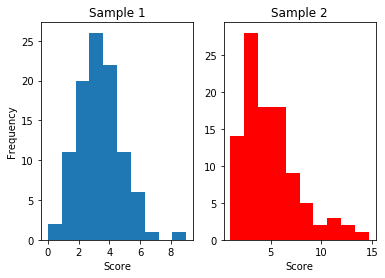

Sample 1 is not normally distributed.

NormaltestResult(statistic=7.423137864018473, pvalue=0.024439149812430682)

Sample 2 is not normally distributed.

NormaltestResult(statistic=25.574024880457877, pvalue=2.7968621211313913e-06)


,score,sample
58,0.0,sample_1
28,0.0,sample_1
99,1.0,sample_1
45,1.0,sample_1
24,1.0,sample_1



 Manually calculated Mann-Whitney U test:


Mann-Whitney U for sample 1 =  6880.0

Mann-Whitney U for sample 2 =  3020.0

The test statistic is:  3020.0
n1 = 100
n2 = 100
p =  6.560576439884613e-07


Verifying the result with scipy.stats:

MannwhitneyuResult(statistic=3020.0, pvalue=6.219144072264984e-07)


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

# creating non-normal data, randomly determining which will have the larger mean rank

sample_size = 100

distributions = [np.random.chisquare(df = 5, size = sample_size), np.random.poisson(lam = 3, size = sample_size)]
distributions = np.random.permutation(distributions)

sample_1_outcome = distributions[0]
sample_2_outcome = distributions[1]

# plotting the data

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.hist(sample_1_outcome)
ax.set_xlabel('Score')
ax.set_ylabel('Frequency')
ax.set_title('Sample 1')

ax2 = fig.add_subplot(1,2,2)
ax2.hist(sample_2_outcome, color = 'red')
ax2.set_xlabel('Score')
ax2.set_title('Sample 2')
plt.show()

# checking for normality

normtest_1 = scipy.stats.normaltest(sample_1_outcome)
normtest_2 = scipy.stats.normaltest(sample_2_outcome)

if normtest_1[1] <= 0.05:
    print('Sample 1 is not normally distributed.\n')
    print(normtest_1)
    
else:
    print('Sample 1 is normally distributed.\n')
    print(normtest_1)
    
if normtest_2[1] <= 0.05:
    print('\nSample 2 is not normally distributed.\n')
    print(normtest_2)
else:
    print('\nSample 2 is normally distributed.\n')
    print(normtest_2)
    
    
# manually performing a Mann-Whitney U test

# creating a dataframe with the scores of both samples

u_sample_1 = np.array([])
u_sample_2 = np.array([])
sample_labels = np.repeat('sample_1', len(sample_1_outcome))
sample_labels = np.append(sample_labels, np.repeat('sample_2', len(sample_2_outcome)))

combined_scores = np.append(sample_1_outcome, sample_2_outcome)

df = pd.DataFrame({'score': combined_scores, 'sample': sample_labels})

# ranking the data by score
df.sort_values(by = 'score', inplace = True)

display(df.head())

u_sample_1 = np.array([])
u_sample_2 = np.array([])


# calculating U by awarding one point to each sample element for each element in the other sample which outranks it

for i in np.arange(len(df)):
    if i >= 1:
        if df['sample'].iloc[i] == 'sample_1':
            outranked = df[(df['sample'] == 'sample_2') & (df['score'] > df['score'].iloc[i])]
            outranked = len(outranked)
            u_sample_1 = np.append(u_sample_1, outranked)
            
        elif df['sample'].iloc[i] == 'sample_2':
            outranked = df[(df['sample'] == 'sample_1') & (df['score'] > df['score'].iloc[i])]
            outranked = len(outranked)
            u_sample_2 = np.append(u_sample_2, outranked)
            
u_sample_1 = np.sum(u_sample_1)
u_sample_2 = np.sum(u_sample_2)

print('\n Manually calculated Mann-Whitney U test:\n')

print('\nMann-Whitney U for sample 1 = ', u_sample_1)
print('\nMann-Whitney U for sample 2 = ', u_sample_2)

smallest_u = np.min([u_sample_1, u_sample_2])

n1 = len(df[df['sample'] == 'sample_1'])
n2 = len(df[df['sample'] == 'sample_2'])

print('\nThe test statistic is: ', smallest_u)
print('n1 =', n1 )
print('n2 =', n2)

# calculating a p-value with the normal approximation (https://www.statstutor.ac.uk/resources/uploaded/mannwhitney.pdf)

z = (smallest_u - (n1*n2/2))/np.sqrt((n1*n2*(n1+n2+1))/12)
p = 1 - scipy.stats.norm.cdf(np.abs(z))
print('p = ', p)
print()

# performing the test with scipy.stats

mann_whit_u = scipy.stats.mannwhitneyu(sample_1_outcome, sample_2_outcome)
print('\nVerifying the result with scipy.stats:\n')
print(mann_whit_u)